# Predicción de tuberculosis usando árboles de decisión



*   **scikit-learn** es una librería que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías como NumPy, SciPy y matplotlib.

*   **Pandas** es una librería de Python especializada en la manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas

In [3]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

*   Se cargan los datos del archivo CSV a un **dataframe**. Un dataframe es una estructura de datos con filas y columnas

In [ ]:
dataFrame1=pd.read_csv('dataTuberculosis2025.csv')
dataFrame1

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COMORBILIDAD,MALNUTRICION,Contactos,ContactosSR,ContactosSRExaminadosconBK,ContactosMenores5Anios,VIHCONFIRMADO,RECIBETAR,RECIBETRIMETOPRIN,RDOBKDX,TUBERCULOSIS
0,0,12.0,2,4,5,0,3,1,1,0,2,2,2,5,0
1,1,22.0,2,4,5,0,2,0,0,0,2,2,2,5,0
2,0,39.0,2,4,5,0,1,0,0,0,2,2,2,5,0
3,0,4.0,2,4,5,0,4,1,1,1,2,2,2,5,0
4,1,28.0,2,4,5,0,2,2,0,1,2,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,42.0,1,4,5,0,3,0,2,0,2,2,2,1,1
1451,1,57.0,2,4,3,0,0,0,0,0,2,2,2,1,1
1452,0,33.0,2,4,1,0,2,0,0,0,2,2,2,1,1
1453,1,26.0,2,4,5,0,3,3,0,2,2,2,2,1,1


In [ ]:
dataFrame1['TUBERCULOSIS'].value_counts()

,count
TUBERCULOSIS,
1,1013
0,442


In [ ]:
dataFrame1.describe()

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COMORBILIDAD,MALNUTRICION,Contactos,ContactosSR,ContactosSRExaminadosconBK,ContactosMenores5Anios,VIHCONFIRMADO,RECIBETAR,RECIBETRIMETOPRIN,RDOBKDX,TUBERCULOSIS
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,0.679038,40.882474,1.863230,3.526460,4.644674,0.050859,2.724399,1.234364,1.124399,0.133333,1.886598,1.914089,1.911340,3.837113,0.696220
std,0.467007,20.038253,0.351635,0.796628,0.983808,0.219785,5.456372,5.284550,5.060058,0.509965,0.376665,0.327826,0.339474,1.102827,0.460047
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,2.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,1.000000,35.000000,2.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,1.000000
75%,1.000000,57.000000,2.000000,4.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,1.000000
max,1.000000,95.000000,2.000000,4.000000,5.000000,1.000000,111.000000,111.000000,111.000000,7.000000,2.000000,2.000000,2.000000,5.000000,1.000000


*   Se usa *info()* para conocer las columnas del dataframe, la cantidad de datos nulos, el tipo de datos de cada columna, y la cantidad de filas

In [ ]:
dataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEXO                        1455 non-null   int64  
 1   EDAD                        1455 non-null   float64
 2   ETNIA                       1455 non-null   int64  
 3   GRUPOPOBLACIONAL            1455 non-null   int64  
 4   COMORBILIDAD                1455 non-null   int64  
 5   MALNUTRICION                1455 non-null   int64  
 6   Contactos                   1455 non-null   int64  
 7   ContactosSR                 1455 non-null   int64  
 8   ContactosSRExaminadosconBK  1455 non-null   int64  
 9   ContactosMenores5Anios      1455 non-null   int64  
 10  VIHCONFIRMADO               1455 non-null   int64  
 11  RECIBETAR                   1455 non-null   int64  
 12  RECIBETRIMETOPRIN           1455 non-null   int64  
 13  RDOBKDX                     1455 

*   Se usa la librería **matplotlib** para graficar





Text(0, 0.5, 'Contactos')

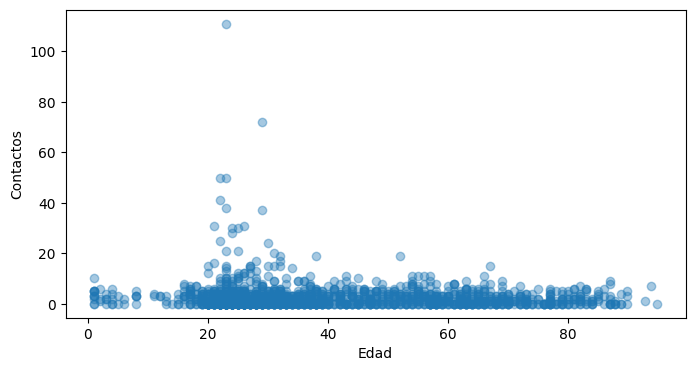

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(x=dataFrame1.EDAD, y=dataFrame1.Contactos, alpha=0.4)
ax.set_xlabel('Edad')
ax.set_ylabel('Contactos')

*   Se seleccionan las **variables independientes**

In [ ]:
X = dataFrame1[["SEXO", "EDAD", "ETNIA", "GRUPOPOBLACIONAL","COMORBILIDAD","MALNUTRICION","Contactos","ContactosSR","ContactosSRExaminadosconBK","ContactosMenores5Anios","VIHCONFIRMADO","RECIBETAR","RECIBETRIMETOPRIN","RDOBKDX"]]
X

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COMORBILIDAD,MALNUTRICION,Contactos,ContactosSR,ContactosSRExaminadosconBK,ContactosMenores5Anios,VIHCONFIRMADO,RECIBETAR,RECIBETRIMETOPRIN,RDOBKDX
0,0,12.0,2,4,5,0,3,1,1,0,2,2,2,5
1,1,22.0,2,4,5,0,2,0,0,0,2,2,2,5
2,0,39.0,2,4,5,0,1,0,0,0,2,2,2,5
3,0,4.0,2,4,5,0,4,1,1,1,2,2,2,5
4,1,28.0,2,4,5,0,2,2,0,1,2,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,42.0,1,4,5,0,3,0,2,0,2,2,2,1
1451,1,57.0,2,4,3,0,0,0,0,0,2,2,2,1
1452,0,33.0,2,4,1,0,2,0,0,0,2,2,2,1
1453,1,26.0,2,4,5,0,3,3,0,2,2,2,2,1


*   Se selecciona la **variable dependiente**

In [ ]:
Y = dataFrame1["TUBERCULOSIS"]
Y

,TUBERCULOSIS
0,0
1,0
2,0
3,0
4,0
...,...
1450,1
1451,1
1452,1
1453,1


In [ ]:
# Se escalan los datos
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

*   Se separa el conjunto de datos en **80% para el entrenamiento** y **20% para pruebas**. La separación se hace indicando el dataframe que tiene las variables independientes (X) y el dataframe con la variable dependiente (Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

*   Se entrena un árbol de decisión

In [ ]:
modelo1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
modelo1.fit(X_train, Y_train)

tree.export_graphviz(decision_tree=modelo1, feature_names=dataFrame1.columns[:-1], class_names=['No Tuberculosis', 'Tuberculosis'],out_file="Arbol Tuberculosis 1.dot")

# criterio indica la función que se utiliza para calcular la impureza de los nodos, gini o entropy
# max_depth es la profundidad máxima del árbol

In [ ]:
modelo2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15)
modelo2.fit(X_train, Y_train)

tree.export_graphviz(decision_tree=modelo2, feature_names=dataFrame1.columns[:-1], class_names=['No Tuberculosis', 'Tuberculosis'],out_file="Arbol Tuberculosis 2.dot")

# criterio indica la función que se utiliza para calcular la impureza de los nodos, gini o entropy
# max_depth es la profundidad máxima del árbol

*   Una vez entrenado el modelo, se usa para hacer las predicciones sobre el conjunto de prueba. Al modelo solo se le pasan los valores de X, es decir, los variables independiente en el conjunto de prueba

In [ ]:
predicciones1 = modelo1.predict(X_test)
print(predicciones1)

[1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1]


In [ ]:
predicciones2 = modelo2.predict(X_test)
print(predicciones2)

[1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1]


*   Se calcula el accuracy, la sensibilidad y especificidad

In [ ]:
accuracy = accuracy_score(Y_test, predicciones1)
sensibilidad = recall_score(Y_test, predicciones1, pos_label=1)
especificidad = recall_score(Y_test, predicciones1, pos_label=0)
print("Accuracy=",accuracy)
print("Recall=",sensibilidad)
print("Especificidad=",especificidad)

Accuracy= 0.5910652920962199
Recall= 0.6572769953051644
Especificidad= 0.41025641025641024


In [ ]:
accuracy = accuracy_score(Y_test, predicciones2)
sensibilidad = recall_score(Y_test, predicciones2, pos_label=1)
especificidad = recall_score(Y_test, predicciones2, pos_label=0)
print("Accuracy=",accuracy)
print("Recall=",sensibilidad)
print("Especificidad=",especificidad)

Accuracy= 0.6151202749140894
Recall= 0.6901408450704225
Especificidad= 0.41025641025641024


In [ ]:
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(Y_test, predicciones1)
matriz1

array([[ 32,  46],
       [ 73, 140]])

In [ ]:
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(Y_test, predicciones2)
matriz2

array([[ 32,  46],
       [ 66, 147]])

Se puede conocar la importancia de las variables según el modelo

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'Variable': ["Sexo", "Edad", "Etnia", "GrupoPoblacional","Comorbilidad","Malnutrición","Contactos","ContactosSR","ContactosSRExaminadosconBK","ContactosMenores5Anios","VIHConfirmado","RECIBETAR","RECIBETRIMETOPRIN","RDOBKDX"],
                             'Importancia': modelo1.feature_importances_}
                            )
print("Importancia de las variables en el modelo1")
importancia_predictores.sort_values('Importancia', ascending=False)

Importancia de las variables en el modelo1


,Variable,Importancia
1,Edad,0.401071
6,Contactos,0.162885
13,RDOBKDX,0.133391
4,Comorbilidad,0.051178
0,Sexo,0.042994
8,ContactosSRExaminadosconBK,0.034684
2,Etnia,0.032394
7,ContactosSR,0.031472
3,GrupoPoblacional,0.028062
9,ContactosMenores5Anios,0.027448
